# Problem Set 4: Sleep Stages and Hypnograms

* 뉴로파이썬 : 파트 1
* 김무성

# Goal

* Problem Set 4 will give you the opportunity to develop your Python programming skills as we explore <font color="red">electroencephalogram (EEG) data</font>. 
* In Problem Set 4, <font color="red">you will write code to classify sleep stages and create hypnograms</font> showing how the sleep stage changes during the sleep epoch.

# Why do neuroscientists create hypnograms?

<img src="http://i1117.photobucket.com/albums/k597/kmokeeffe/Sleep%20on%20it%20blog/Hypnogram.jpg" />

* Sleep researchers classify sleep into multiple stages based on various physiological characteristics including 
    - eye movements (detected by electrooculography, <font color="red">EOG</font>)
    - muscle tone (detected by electromyography, <font color="red">EMG</font>)
    - neural activity (detected by <font color="red">EEG</font>). 
* These stages include both 
    - rapid eye movement (<font color="red">REM</font>)
    - non-rapid eye movement (<font color="red">NREM</font>) sleep. 
* NREM sleep can be further divided into three or four categories based on specific EEG activity patterns.

#### Hypnograms are useful tools to visualize how sleep stages change throughout the night.

* In general, a night of sleep consists of 
    * multiple <font color="red">sleep cycles about 90 minutes in duration</font>.
        - Early cycles 
            - have the most slow wave sleep (<font color="red">SWS</font> - the deepest levels of NREM sleep) 
        - while later cycles have the most <font color="red">REM</font> sleep
        - and may even include periods of <font color="red">wakefulness</font>. 
        
* Hypnogram analysis may indicate disrupted sleep resulting from various medical conditions or disorders or as a side-effect from various drugs.

* Hypnograms are traditional constructed by visual inspection of the physiological signals. 
    * Researchers classify sleep in <font color="red">30 second epochs</font>

# Why do neuroscientists use automatic classifiers?

* Neuroscientists often seek to “decode” the neural signal recorded during experiments. 
* The purpose of this decoding may be 
    - <font color="red">to understand how the neural activity relates to overall brain state or human behavior</font> (as in this problem set), 
    - or the purpose of decoding may be <font color="red">to drive neuroprosthetic devices</font> (as we learned about from Dr. Donoghue). 
* <font color="red">Classifiers are simply algorithms that attempt to assign meaning (in our case, sleep stages) to activity</font>.
* In this problem set, we will guide you to complete a simple classifier.
    - Because the classifier will be quite simple, its performance may not be that high. 
* Neuroscientists often apply <font color="red">technically advanced machine learning techniques</font> to build classifiers of neural activity. 
    - Some machine learning algorithms learn to classify data in a <font color="red">“supervised”</font> way by learning from data that has been pre-classified (for example, by the human researchers who developed our data set.). 
    - Other algorithms seek to find the different groups or clusters of data within the existing set in an <font color="red">“unsupervised”</font> manner and then classify data into these groups. 

# To complete this problem set, you will

* Examine examples of <font color="red">pre-classified sleep data</font>.
* Write functions <font color="red">to predict sleep state</font>.
* Write functions <font color="red">to visualize how sleep state changes with time</font>.

# At the end of this problem set, you will

* Complete a programming assignment submission which will evaluate that your functions can predict sleep state.
* Complete a peer assessment submission to confirm that you are clearly displaying power spectra and plotting hypnograms. (To receive credit for the peer assessment, you must complete your peer evaluation by the evaluation due date.)
* Complete some short questions to assess your ability to interpret the data.

# Things to keep in mind while you are coding

* It’s really <font color="red">easy to make mistakes</font> when you are writing code. It happens to everyone. <font color="red">Try not to get frustrated</font>. Ask for help if you need it!
* Sometimes <font color="red">it is useful to print out the values</font> of some of your variables to make sure things are going as you want them to (or you can use the debugger in Spyder – but printing is sometimes much easier!)
* It is often very useful to write out your logic <font color="red">with pencil and paper before you begin</font>.

# Data Set

* This data set contains 
    - <font color="red">one channel of EEG data</font> recorded 
    - from <font color="red">one subject</font> 
    - during <font color="red">one night of sleep</font>. 
* The data has also been classified by researchers according to the Rectshaffen and Kales criteria (see above).

# Getting started

Your first step is to open problem_set4.py in Spyder (or whatever Python environment you are choosing to use.) Again, you will want to open an IPython console in Spyder. Looking at the .py file, you’ll see that it starts with some comments, and some import commands. You’ll also see some functions (and skeletons of functions) that we will work through as we go through the problem set. Below all the functions, you can write lines of code to run. (We provide hints in the comments)

# Step by Step

* Step 1: Exploring the Provided Example
* Step 2: Determine the rules to “guess” the sleep stage
* Step 3: Turn your rules into code 
* Step 4: Test your classifier
* Step 5: Displaying Your Results
* Step 6: Complete the Assignment

# Step 1: Exploring the Provided Example

* Loading the example data
* Look for differences in EEG between states
* We have some homework questions about the examples
* Looking at variability within the sleep stages

In the first part of the problem set, you will look at some provided EEG data that has already been classified. While you look at the data, you are trying to determine the “rules” you might use to classify sleep state.

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pylab as plt
import matplotlib.mlab as m

## Loading the example data

In [14]:
# load_examples takes the file name and reads in the data.  It returns an
# array containing the 4 examples of the 4 stages in its rows (row 0 = REM;
# 1 = stage 1 NREM; 2 = stage 2; 3 = stage 3 and 4) 
# and the sampling rate for the data in Hz (samples per second).

In [4]:
data = np.load('data/example_stages.npz')

In [5]:
data

In [6]:
data.keys()

['srate', 'examples']

In [9]:
data['examples'].ndim

2

In [8]:
data['examples'].size

153596

In [20]:
data['srate']

array(128, dtype=int32)

In [12]:
def load_examples(filename):
    data = np.load(filename)
    return data['examples'], int(data['srate'])

In [13]:
examples, srate = load_examples('data/example_stages.npz')

In [14]:
examples[1,:].size * 30 / (60*60*60)

5.333194444444445

In [17]:
examples[0,0]

9.8925273179288382

This reads in the example file and stores the data in a 2-dimensional array (examples). Each
row in the array corresponds to 5 minutes of data from one sleep stage.

* Row 0: REM sleep
* Row 1: Stage 1 NREM sleep
* Row 2: Stage 2 NREM sleep
* Row 3: Stage 3 and 4 NREM sleep (for this problem set, we will combine stages 3 and 4, as in the AASM criteria.)

srate contains the sampling rate for the data.

### What is that sampling rate for this data?

In [24]:
srate

128

## Look for differences in EEG between states

* Now that we have these four examples, 
    - you can <font color="red">plot the power spectral density</font> of the four sleep stages 
    - to look for differences between the EEG signals recorded 
    - during each of the these sleep epochs.

* We have started 
    - the function <font color="red">plot_example_psds</font> for you. 
    - You can use the <font color="red">m.psd</font> function (NFFT values of 256 and 512 are both reasonable for this data set). 
    - You may find the function plt.legend helpful, as well as the plt.xlim function useful for constraining the plot to about 20 or 30 Hz.
    - (If you don’t constrain the plot, you will see a small peak at 60 Hz. 60 Hz is a common frequency for electrical noise in the United States, and researchers try to minimize it as much as possible).

#### 참고 : Power spectral density ?

* http://www.mcublog.co.kr/433
* http://nfx.co.kr/techpaper/keyword_view.asp?idx=283&pg=14
    


<img src="http://cfile5.uf.tistory.com/image/16672D0F4A8209315E4720" />

<img src="http://cfile4.uf.tistory.com/image/1259CA0E4A8209326E71A7" />

In [25]:
# This function creates a figure with 4 lines to show the overall psd for 
# the four sleep examples. (Recall row 0 is REM, rows 1-3 are NREM stages 
# 1, 2 and 3/4)

* We have started the function plot_example_psds for you. You can use the m.psd
function (NFFT values of 256 and 512 are both reasonable for this data set). You may find the
function plt.legend helpful, as well as the plt.xlim function useful for constraining the
plot to about 20 or 30 Hz.

In [18]:
m.psd?

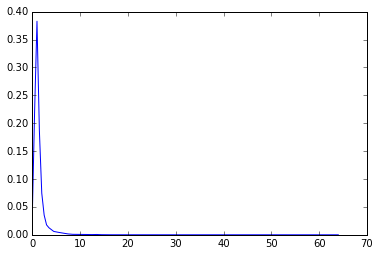

In [37]:
Pxx, freqs = m.psd(examples[3,:],NFFT=256,Fs=srate)
plt.plot(freqs,Pxx/sum(Pxx),hold=True)

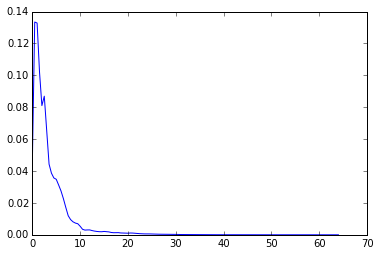

In [31]:
Pxx, freqs = m.psd(examples[1,:],NFFT=256,Fs=srate)
plt.plot(freqs,Pxx/sum(Pxx),hold=True)

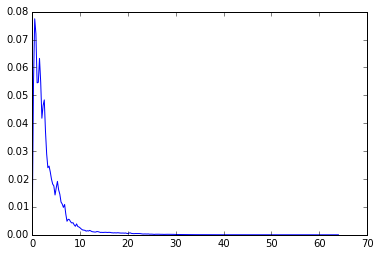

In [30]:
Pxx, freqs = m.psd(examples[1,:],NFFT=512,Fs=srate)
plt.plot(freqs,Pxx/sum(Pxx),hold=True)

(0, 20)

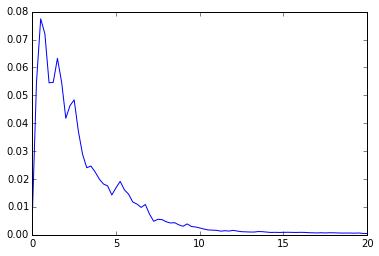

In [34]:
plt.figure()
Pxx, freqs = m.psd(examples[1,:],NFFT=512,Fs=srate)
plt.plot(freqs,Pxx/sum(Pxx),hold=True)
plt.xlim((0,20))

(0, 30)

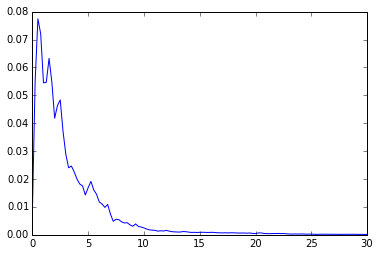

In [33]:
plt.figure()
Pxx, freqs = m.psd(examples[1,:],NFFT=512,Fs=srate)
plt.plot(freqs,Pxx/sum(Pxx),hold=True)
plt.xlim((0,30))

In [26]:
def plot_example_psds(examples,rate):
    plt.figure()
    for i in range(4):
        Pxx, freqs = m.psd(examples[i,:],NFFT=512,Fs=rate)
        plt.plot(freqs,Pxx/sum(Pxx),hold=True)
    plt.xlim((0,30))
    plt.legend(('REM','NREM 1','NREM 2','NREM 3/4'))

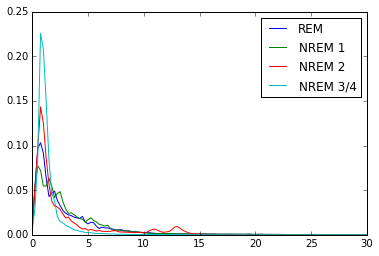

In [55]:
plot_example_psds(examples,srate)

## We have some homework questions about the examples

* REM sleep looks most similar to which stage of NREM sleep?
* NREM stages 3 and 4 are dominated by which frequencies?
* Sleep spindles, typically between 11-15 Hz, are most likely prominent in which sleep
stage?

## Looking at variability within the sleep stages

* The plots we just made were over the <font color="red">entire 5 minute period</font>, 
* but researchers <font color="red">score sleep every 30 seconds</font> (and you are welcome to play with window size during this problem set – 
* although we will ultimately ask you to focus on <font color="red">30 second bins</font>). It is also useful to consider this variability before we begin classifying the data. 
* We can easily see the variability using <font color="red">spectrograms</font>.

#### 참고자료

* 스펙트로그램(Spectrogram) : 시간에 따른 주파수 성분의 변화를 나타내 주는 그림으로 가로축은 시간의 디멘젼을 세로축은 주파수의 디멘젼을 갖는다. 실제로 계산할 때는 일정한 간격으로 연속적인 FFT를 수행해서 얻은 결과를 3차원 등고선이나 그레이레벨로 나타내 준다. 주로 음성신호, 음향신호, 음악신호등의 성분의 변화를 관찰할 때 사용된다.
* http://sarim.changwon.ac.kr/~cwjo/lecture/dsp/dspterms.html

In [ ]:
# This function creates a figure with spectrogram sublpots to of the four
# sleep examples. (Recall row 0 is REM, rows 1-3 are NREM stages 1,
# 2 and 3/4)

In [54]:
plt.specgram?

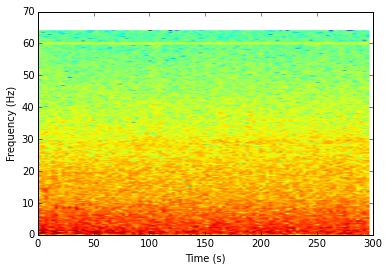

In [50]:
plt.figure()
plt.specgram(examples[0,:],NFFT=512,Fs=srate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

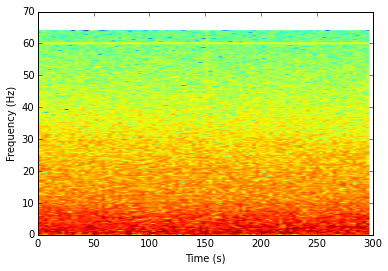

In [51]:
plt.figure()
plt.specgram(examples[1,:],NFFT=512,Fs=srate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

In [52]:
def plot_example_spectrograms(example,rate):
    plt.figure()
    for i in range(4):
        plt.subplot(2,2,i+1)
        Pxx, freqs, bins, im = plt.specgram(examples[i,:],NFFT=512,Fs=rate)
        if i == 0:
            plt.title('REM example')
        else:
            plt.title('NREM ' + str(i) + ' example')
        plt.ylim((0,40))
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
    
    return bins

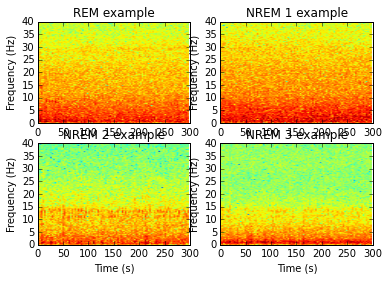

In [55]:
bins = plot_example_spectrograms(examples, srate)

In [56]:
bins

array([   2.,    5.,    8.,   11.,   14.,   17.,   20.,   23.,   26.,
         29.,   32.,   35.,   38.,   41.,   44.,   47.,   50.,   53.,
         56.,   59.,   62.,   65.,   68.,   71.,   74.,   77.,   80.,
         83.,   86.,   89.,   92.,   95.,   98.,  101.,  104.,  107.,
        110.,  113.,  116.,  119.,  122.,  125.,  128.,  131.,  134.,
        137.,  140.,  143.,  146.,  149.,  152.,  155.,  158.,  161.,
        164.,  167.,  170.,  173.,  176.,  179.,  182.,  185.,  188.,
        191.,  194.,  197.,  200.,  203.,  206.,  209.,  212.,  215.,
        218.,  221.,  224.,  227.,  230.,  233.,  236.,  239.,  242.,
        245.,  248.,  251.,  254.,  257.,  260.,  263.,  266.,  269.,
        272.,  275.,  278.,  281.,  284.,  287.,  290.,  293.,  296.])

# Step 2: Determine the rules to “guess” the sleep stage

* Now that <font color="red">you can see the differences between the states</font>, you will formulate rules <font color="red">to guess the state of unknown EEG signal</font>. 
* It’s time to use some of your own creativity! We haven’t provided you with any specific functions here. 
* This is really just an opportunity for you to delve deeper into the data you have just explored in an effort to quantify exactly what makes the three sleep states differ. 
* In the problem set, will not be scoring any of the code or figures you use to generate your rules. This is all for your own discovery process.

* Try !!
    - <font color="red">Create the PSD</font> over each 30s epoch <font color="red">from each of the three sample NREM</font> data sets.
    - <font color="red">Visualize the power in the frequency bands</font> that you expect to be most different between the three stages of NREM sleep. (Hint: Consider the answers to the questions posed above.)
        - You may want to <font color="red">consider the distribution of the power</font> in your bands of interest over the 5 minutes of samples.
        - One way to <font color="red">visualize the distribution would be to use histograms</font>. (Hint: Check out the parameters for plt.hist. <font color="red">Cumulative, normalized histograms</font> drawn with histtype= 'step' can create a nice visual for you to consider.)
        - <font color="red">Examine these distributions</font> yourself. (By this, we mean LOOK at the data – don’t just rely on code to find the answers.) Do the three types of sleep have different distributions? What makes them different?
        - Use the differences you’ve identified <font color="red">to create a set of rules to classify the data</font>. Write down the rules for reference. We’ll turn them into code in the next step!

# Step 3: Turn your rules into code

* Writing your classifier

* You will complete the function classify_epoch(epoch,rate)which takes an epoch of frequency data and the sampling rate, and <font color="red"> returns the best classification for that epoch</font>. 
* (The returned value should be integers as follows:
    - 1 : for Stage 1 NREM
    - 2 : for Stage 2 NREM
    - 3 : for Stage 3/4 NREM

## Writing your classifier

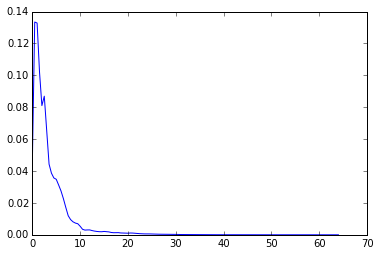

In [65]:
Pxx, freqs = m.psd(examples[1,:],NFFT=256,Fs=srate)
plt.plot(freqs,Pxx/sum(Pxx),hold=True)

In [68]:
Pxx.size

129

In [67]:
Pxx[:5]

array([ 15.89277107,  48.00050937,  47.7635692 ,  36.76578417,  29.13982326])

(array([ 114.,    2.,    5.,    2.,    1.,    0.,    2.,    1.,    0.,    2.]),
 array([  2.35826576e-04,   4.80026318e+00,   9.60029053e+00,
          1.44003179e+01,   1.92003452e+01,   2.40003726e+01,
          2.88004000e+01,   3.36004273e+01,   3.84004547e+01,
          4.32004820e+01,   4.80005094e+01]),
 <a list of 10 Patch objects>)

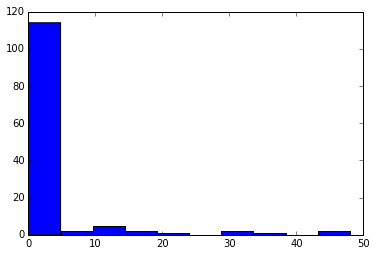

In [70]:
plt.hist(Pxx)

(array([ 0.88372093,  0.89922481,  0.9379845 ,  0.95348837,  0.96124031,
         0.96124031,  0.97674419,  0.98449612,  0.98449612,  1.        ]),
 array([  2.35826576e-04,   4.80026318e+00,   9.60029053e+00,
          1.44003179e+01,   1.92003452e+01,   2.40003726e+01,
          2.88004000e+01,   3.36004273e+01,   3.84004547e+01,
          4.32004820e+01,   4.80005094e+01]),
 <a list of 10 Patch objects>)

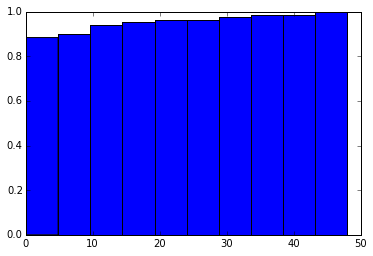

In [80]:
plt.hist(Pxx, normed=1, cumulative=True)

(array([ 0.01574612,  0.01574612,  0.01574612,  0.01574612,  0.01453488,
         0.01574612,  0.01574612,  0.01574612,  0.01574612,  0.01574612]),
 array([  0. ,   6.4,  12.8,  19.2,  25.6,  32. ,  38.4,  44.8,  51.2,
         57.6,  64. ]),
 <a list of 10 Patch objects>)

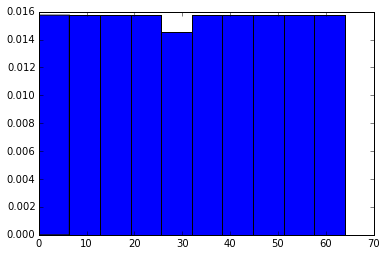

In [79]:
plt.hist(freqs)

(array([ 0.10077519,  0.20155039,  0.30232558,  0.40310078,  0.49612403,
         0.59689922,  0.69767442,  0.79844961,  0.89922481,  1.        ]),
 array([  0. ,   6.4,  12.8,  19.2,  25.6,  32. ,  38.4,  44.8,  51.2,
         57.6,  64. ]),
 <a list of 10 Patch objects>)

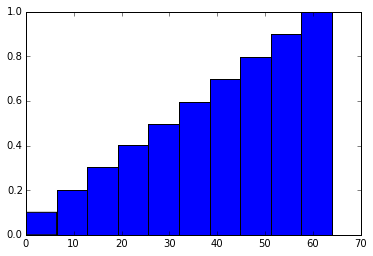

In [78]:
plt.hist(freqs, normed=1, cumulative=True)

In [72]:
plt.find(0<freqs)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128])

In [57]:
def classify_epoch(epoch,rate):
    """
    This function returns a sleep stage classification (integers: 1 for NREM
    stage 1, 2 for NREM stage 2, and 3 for NREM stage 3/4) given an epoch of 
    EEG and a sampling rate.
    """
    Pxx, freqs = m.psd(epoch,NFFT=256,Fs=rate)
    nPxx = Pxx/float(sum(Pxx))
    delta_f = plt.find((0<freqs) & (freqs <=3))
 #   delta_power = sum(Pxx[delta_f])
    ndelta_power = sum(nPxx[delta_f])
    spindles_f = plt.find((11 <= freqs) & (freqs <= 15))
 #   spindle_power = sum(Pxx[spindles_f])
    nspindle_power = sum(nPxx[spindles_f])
  #  ratio = spindle_power/delta_power
    
    if (ndelta_power > 0.8): #suggests stage 3
        stage = 3
    else:  
        if (nspindle_power > 0.03): #suggests stage 2
            stage = 2
        else: 
            stage = 1
    
    return stage

In [61]:
i = 0
bin_size = 30*srate
j = 1
epoch = examples[j,range(i,i+bin_size)]

In [62]:
epoch

array([ 16.08339992,  16.70690535,  12.06434029, ...,  -3.26351257,
        -6.4639324 ,  -6.90700489])

In [63]:
epoch.size

3840

In [64]:
classify_epoch(epoch,srate)

1

# Step 4: Test your classifier

In [63]:
def classifier_tester(classifiedEEG, actualEEG):
    """
    returns percent of 30s epochs correctly classified
    """
    epochs = len(classifiedEEG)
    incorrect = np.nonzero(classifiedEEG-actualEEG)[0]
    percorrect = (epochs - len(incorrect))/epochs*100
    
    print 'EEG Classifier Performance: '
    print '     Correct Epochs = ' + str(epochs-len(incorrect))
    print '     Incorrect Epochs = ' + str(len(incorrect))
    print '     Percent Correct= ' + str(percorrect) 
    print 
    return percorrect

In [61]:
def test_examples(examples, srate):
    """
    This is one example of how you might write the code to test the provided 
    examples.
    """
    i = 0
    bin_size = 30*srate
    c = np.zeros((4,len(examples[1,:])/bin_size))
    while i + bin_size < len(examples[1,:]):
        for j in range(1,4):
            c[j,i/bin_size] = classify_epoch(examples[j,range(i,i+bin_size)],srate)
        i = i + bin_size
    
    totalcorrect = 0
    num_examples = 0
    for j in range(1,4):
        canswers = np.ones(len(c[j,:]))*j
        correct = classifier_tester(c[j,:],canswers)
        totalcorrect = totalcorrect + correct
        num_examples = num_examples + 1
    
    average_percent_correct = totalcorrect/num_examples
    print 'Average Percent Correct= ' + str(average_percent_correct) 
    return average_percent_correct

In [64]:
test_examples(examples,srate)

EEG Classifier Performance: 
     Correct Epochs = 9
     Incorrect Epochs = 0
     Percent Correct= 100.0

EEG Classifier Performance: 
     Correct Epochs = 9
     Incorrect Epochs = 0
     Percent Correct= 100.0

EEG Classifier Performance: 
     Correct Epochs = 9
     Incorrect Epochs = 0
     Percent Correct= 100.0

Average Percent Correct= 100.0


100.0

In [65]:
def load_eeg(filename):
    """
    load_eeg takes the file name and reads in the data.  It returns an
    array containing EEG data and the sampling rate for
    the data in Hz (samples per second).
    """
    data = np.load(filename)
    return data['eeg'], int(data['srate'])

In [66]:
def load_stages(filename):
    """
    load_stages takes the file name and reads in the stages data.  It returns an
    array containing the correct stages (one for each 30s epoch)
    """
    data = np.load(filename)
    return data['stages']

In [67]:
eeg, srate = load_eeg('data/practice_eeg.npz')
stages = load_stages('data/practice_answers.npz')

In [68]:
def classify_eeg(eeg,srate):
    """
    DO NOT MODIFY THIS FUNCTION
    classify_eeg takes an array of eeg amplitude values and a sampling rate and 
    breaks it into 30s epochs for classification with the classify_epoch function.
    It returns an array of the classified stages.
    """
    bin_size_sec = 30
    bin_size_samp = bin_size_sec*srate
    t = 0
    classified = np.zeros(len(eeg)/bin_size_samp)
    while t + bin_size_samp < len(eeg):
       classified[t/bin_size_samp] = classify_epoch(eeg[range(t,t+bin_size_samp)],srate)
       t = t + bin_size_samp
    return classified

In [69]:
classified = classify_eeg(eeg,srate)

In [70]:
performance = classifier_tester(classified,stages)

EEG Classifier Performance: 
     Correct Epochs = 108
     Incorrect Epochs = 22
     Percent Correct= 83.0769230769



# Step 5: Displaying Your Results

* Use your classifier on unknown data

In [72]:
def plot_hypnogram(eeg, stages, srate):
    """
    This function takes the eeg, the stages and sampling rate and draws a 
    hypnogram over the spectrogram of the data.
    """
    
    fig,ax1 = plt.subplots()  #Needed for the multiple y-axes
    #Use the specgram function to draw the spectrogram as usual
    Pxx, freqs, bins, im = plt.specgram(eeg,NFFT=512,Fs=srate) 

    #Label your x and y axes and set the y limits for the spectrogram
    plt.xlabel('Time (sec)')
    plt.ylim((0,30))
    plt.ylabel('Frequency (Hz)')

    
    ax2 = ax1.twinx() #Necessary for multiple y-axes
    #Use ax2.plot to draw the hypnogram.  Be sure your x values are in seconds
    #HINT: Use drawstyle='steps' to allow step functions in your plot
    ax2.plot(np.arange(0,len(stages)*30,30),stages,drawstyle='steps')

    #Label your right y-axis and change the text color to match your plot
    ax2.set_ylabel('NREM Stage',color='b')

 
    #Only display the possible values for the stages
    plt.xlim(0,3600)
    plt.ylim((0.5,3.5))
    ax2.set_yticks(np.arange(1,4))
    
    #Change the left axis tick color to match your plot
    for t1 in ax2.get_yticklabels():
        t1.set_color('b')
    
    #Title your plot    
    plt.title('Hypnogram - Practice Data')

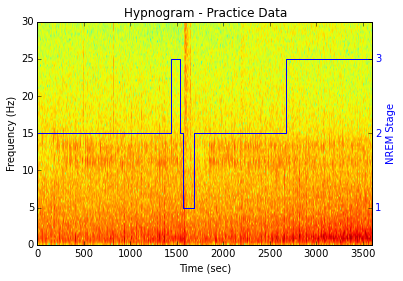

In [73]:
plot_hypnogram(eeg, stages, srate)

## Use your classifier on unknown data

# Step 6: Complete the Assignment